#**IA Scientific Computing Session 5**#

Ruize Li

rl737

Jesus College Cambridge

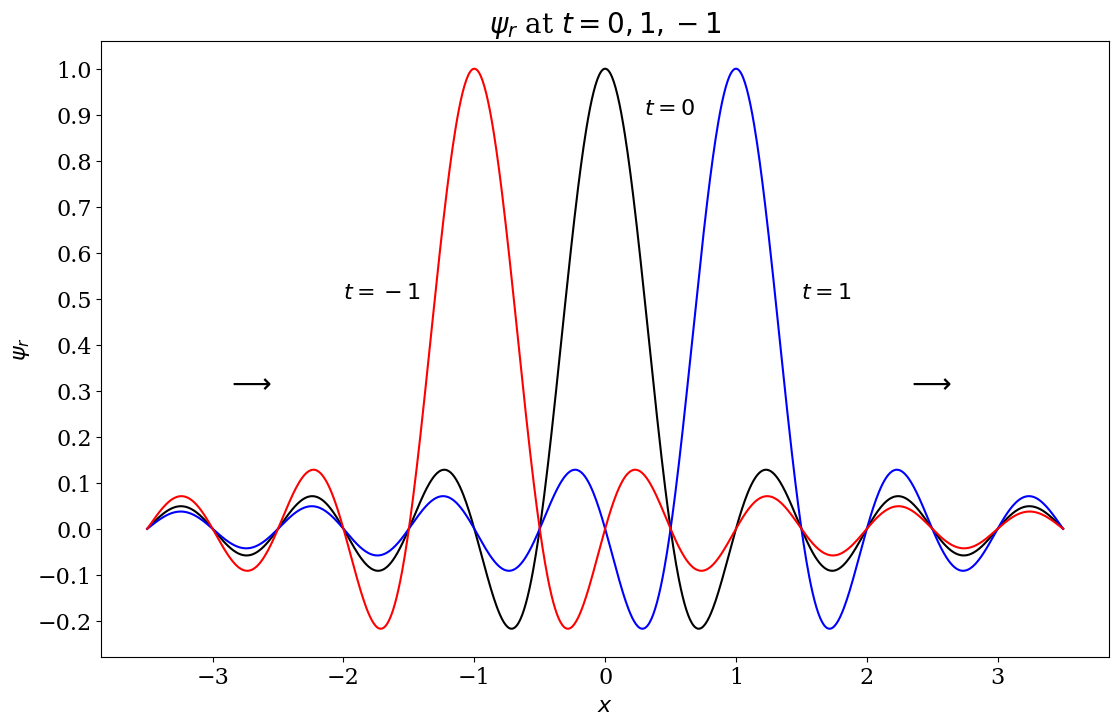

In [1]:
# Import the packages we need
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm  # For the colourmaps
from mpl_toolkits.mplot3d import Axes3D

# Set font for labels in coming figures
font16 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

# Set font for labels in coming figures
font20 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 20,
          }

# Define constants
k = 2*pi # All in SI units

# Define the wave function
def psi_r(x,t):
  return np.sin(k*(x-t))/(k*(x-t)) # Here A=1, k=2*pi, c=1.

# Plot the frame
plt.figure(figsize=(13,8))
plt.title("$\psi_r$ at $t=0,1,-1$",fontdict=font20)
plt.xlabel("$x$",fontdict=font16)
plt.ylabel("$\psi_r$",fontdict=font16)
plt.xticks(np.arange(-3, 4, step=1),fontsize=16,fontfamily='serif')
plt.yticks(np.arange(-0.3, 1.1, step=0.1),fontsize=16,fontfamily='serif')

# Define x
x = np.linspace(-3.5,3.5,1000)

# Plot phi_r against x
plt.plot(x,psi_r(x,0),color='black')
plt.plot(x,psi_r(x,1),color='blue')
plt.plot(x,psi_r(x,-1),color='red')

# Label the graph
plt.text(-2, 0.5, r'$t= -1$', fontdict=font16)
plt.text(1.5, 0.5, r'$t= 1$', fontdict=font16)
plt.text(0.3, 0.9, r'$t=0$', fontdict=font16)
plt.text(2.3, 0.3, r'$\longrightarrow$', fontdict=font20)
plt.text(-2.9, 0.3, r'$\longrightarrow$', fontdict=font20)

# Print the graph
plt.savefig('psir at t equals 01-1.png',format='png', dpi=300)
plt.savefig('psir at t equals 01-1.pdf',format='pdf')
plt.show()

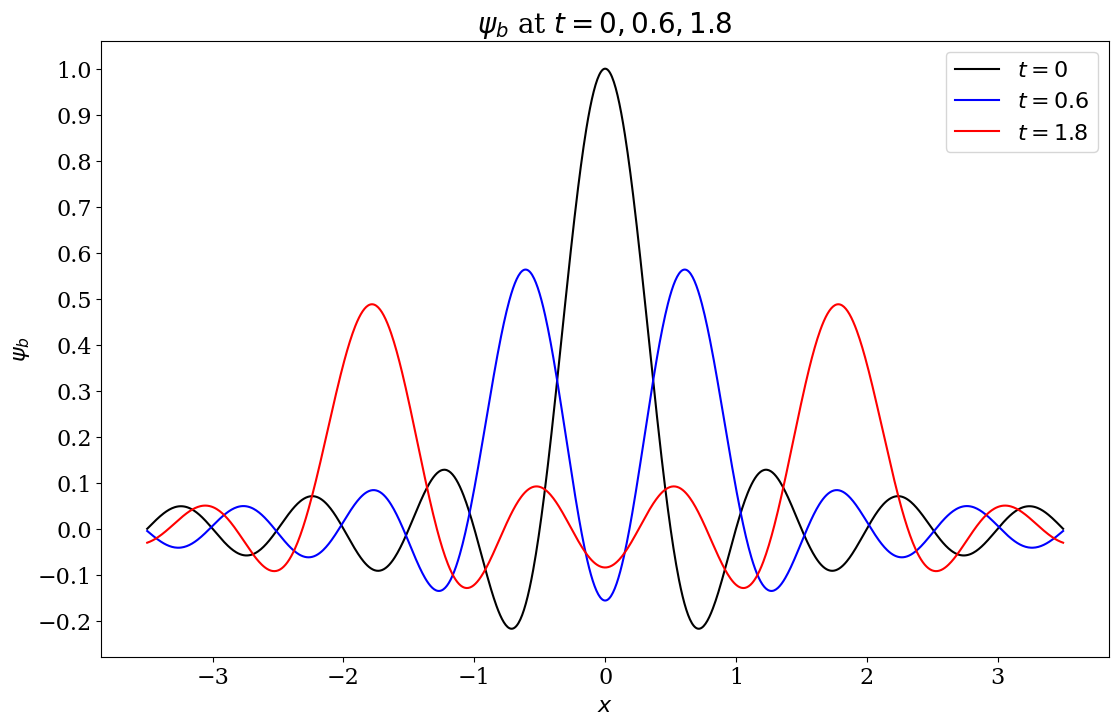

In [2]:
# Define the wave function
def psi_b(x,t):
  return (1/2)*((np.sin(k*(x-t))/(k*(x-t)))+(np.sin(k*(x+t))/(k*(x+t)))) # Here A=1, k=2*pi, c=1.

# Plot the frame
plt.figure(figsize=(13,8))
plt.title("$\psi_b$ at $t=0,0.6,1.8$",fontdict=font20)
plt.xlabel("$x$",fontdict=font16)
plt.ylabel("$\psi_b$",fontdict=font16)
plt.xticks(np.arange(-3, 4, step=1),fontsize=16,fontfamily='serif')
plt.yticks(np.arange(-0.3, 1.1, step=0.1),fontsize=16,fontfamily='serif')

# Define x
x = np.linspace(-3.5,3.5,1000)

# Plot phi_r against x
plt.plot(x,psi_b(x,0),color='black',label='$t=0$')
plt.plot(x,psi_b(x,0.6),color='blue',label='$t=0.6$')
plt.plot(x,psi_b(x,1.8),color='red',label='$t=1.8$')
plt.legend(fontsize=16)

# Print the graph
plt.savefig('psib at t equals 00.61.8.png',format='png', dpi=300)
plt.savefig('psib at t equals 00.61.8.pdf',format='pdf')
plt.show()

<ipython-input-3-2cf84fced9ad>:4: RuntimeWarning: invalid value encountered in divide
  z = np.sin(k*(xx-tt))/(k*(xx-tt))


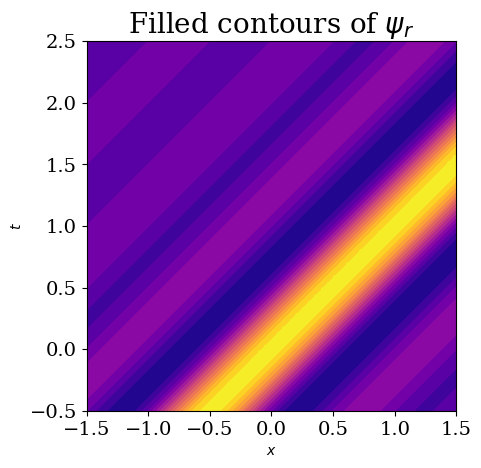

In [3]:
# Contourf plot for psi_r(x,t)
t = np.linspace(-0.5,2.5,1000)
xx, tt = np.meshgrid(x,t)
z = np.sin(k*(xx-tt))/(k*(xx-tt))

plt.axes().set_aspect('equal')
plt.xlim(-1.5,1.5)
plt.title('Filled contours of $\psi_r$', fontdict=font20)
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xticks(np.arange(-1.5, 2, step=0.5),fontsize=14,fontfamily='serif')
plt.yticks(np.arange(-0.5, 3, step=0.5),fontsize=14,fontfamily='serif')

plt.contourf(x,t,z, levels=18, cmap='plasma')
plt.show()

<ipython-input-4-d871ef47d32b>:2: RuntimeWarning: invalid value encountered in divide
  h = (1/2)*((np.sin(k*(xx-tt))/(k*(xx-tt)))+(np.sin(k*(xx+tt))/(k*(xx+tt))))


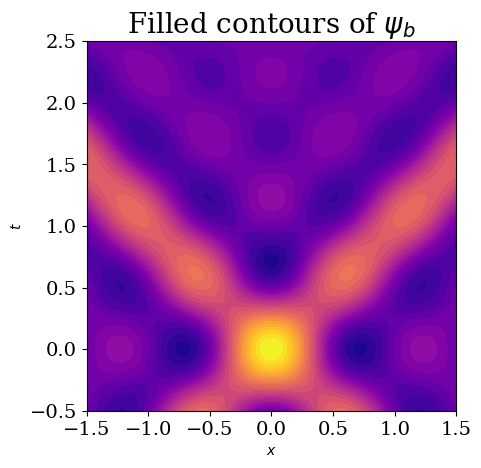

In [4]:
# Contourf plot for psi_b(x,t)
h = (1/2)*((np.sin(k*(xx-tt))/(k*(xx-tt)))+(np.sin(k*(xx+tt))/(k*(xx+tt))))

plt.axes().set_aspect('equal')
plt.xlim(-1.5,1.5)
plt.title('Filled contours of $\psi_b$', fontdict=font20)
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xticks(np.arange(-1.5, 2, step=0.5),fontsize=14,fontfamily='serif')
plt.yticks(np.arange(-0.5, 3, step=0.5),fontsize=14,fontfamily='serif')

plt.contourf(x,t,h, levels=28, cmap='plasma')
plt.show()

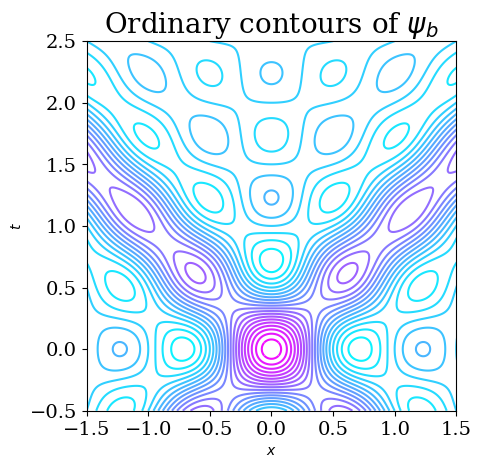

In [5]:
# Contour plot for psi_b
plt.axes().set_aspect('equal')
plt.xlim(-1.5,1.5)
plt.title('Ordinary contours of $\psi_b$', fontdict=font20)
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.xticks(np.arange(-1.5, 2, step=0.5),fontsize=14,fontfamily='serif')
plt.yticks(np.arange(-0.5, 3, step=0.5),fontsize=14,fontfamily='serif')

plt.contour(x,t,h, levels=22, cmap='cool')
plt.savefig('contours of psib.pdf',format='pdf')
plt.show()

<ipython-input-6-d431c942366f>:4: RuntimeWarning: invalid value encountered in divide
  g = (1/2)*((np.sin(k*(yy-tt))/(k*(yy-tt)))+(np.sin(k*(yy+tt))/(k*(yy+tt))))


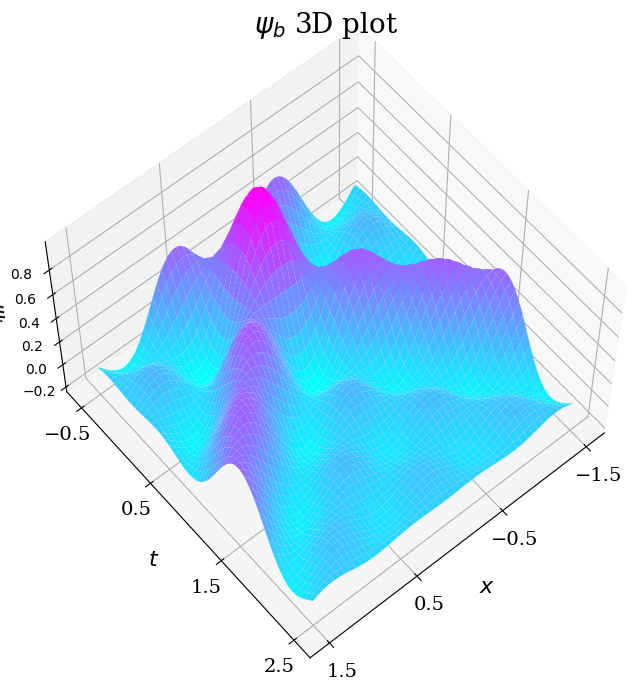

In [6]:
# 3D Plot of the same contour above
y = np.linspace(-1.5,1.5,1000)
yy, tt = np.meshgrid(y,t)
g = (1/2)*((np.sin(k*(yy-tt))/(k*(yy-tt)))+(np.sin(k*(yy+tt))/(k*(yy+tt))))

fig1 = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.view_init(60, 50)
ax.plot_surface(yy,tt,g, cmap=cm.cool)

plt.xticks(np.arange(-1.5, 2, step=1),fontsize=14,fontfamily='serif')
plt.yticks(np.arange(-0.5, 3, step=1),fontsize=14,fontfamily='serif')
plt.xlabel('$x$',fontdict=font16)
plt.ylabel('$t$',fontdict=font16)
ax.set_zlabel('$\psi_b$', rotation=90,fontdict=font16)
plt.title('$\psi_b$ 3D plot',fontdict=font20)

plt.show()

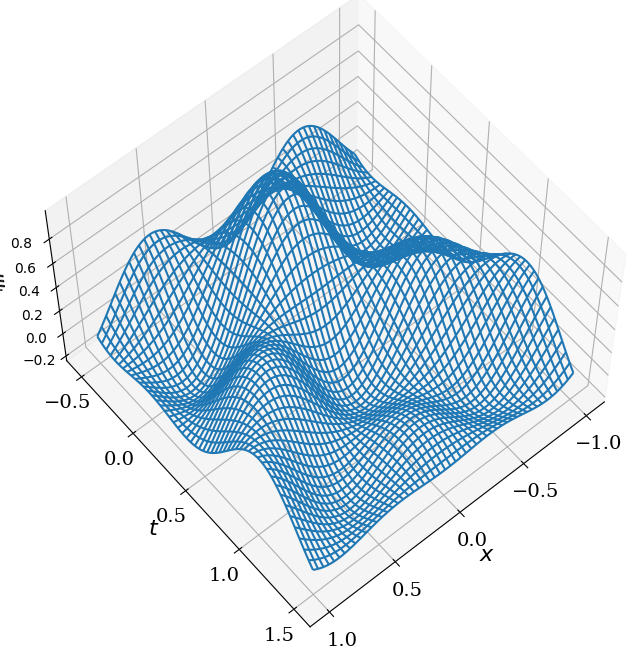

In [7]:
z = np.linspace(-1,1,1000)
u = np.linspace(-0.5,1.5,1000)
zz, uu = np.meshgrid(z,u)
f = (1/2)*((np.sin(k*(zz-uu))/(k*(zz-uu)))+(np.sin(k*(zz+uu))/(k*(zz+uu))))

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.view_init(60, 50)

plt.xticks(np.arange(-1.5, 2, step=0.5),fontsize=14,fontfamily='serif')
plt.yticks(np.arange(-0.5, 3, step=0.5),fontsize=14,fontfamily='serif')
plt.xlabel('$x$',fontdict=font16)
plt.ylabel('$t$',fontdict=font16)
ax.set_zlabel('$\psi_b$', rotation=90,fontdict=font16)

ax.plot_wireframe(zz,uu,f)
plt.show()